In [1]:
# ============================================================================
# CELL 1: Import Required Libraries
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")


✓ Libraries imported successfully!
Pandas Version: 2.3.2
NumPy Version: 1.26.4


In [2]:
# ============================================================================
# CELL 2: Load Dataset
# ============================================================================

# Load the CSV file
df = pd.read_csv('dataset\\accident_prediction_india.csv')

print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*80)

# Display first few rows
print("\nFirst 5 Records:")
print(df.head())


DATASET LOADED SUCCESSFULLY
Dataset Shape: 3000 rows × 22 columns
Memory Usage: 3.01 MB

First 5 Records:
          State Name City Name  Year    Month Day of Week Time of Day Accident Severity  Number of Vehicles Involved Vehicle Type Involved  Number of Casualties  Number of Fatalities Weather Conditions         Road Type      Road Condition Lighting Conditions Traffic Control Presence  Speed Limit (km/h)  Driver Age Driver Gender Driver License Status Alcohol Involvement Accident Location Details
0  Jammu and Kashmir   Unknown  2021      May      Monday        1:46           Serious                            5                 Cycle                     0                     4               Hazy  National Highway                 Wet                Dark                    Signs                  61          66          Male                   NaN                 Yes                     Curve
1      Uttar Pradesh   Lucknow  2018  January   Wednesday       21:30             Minor         

In [3]:
# ============================================================================
# CELL 3: Dataset Structure Analysis - Overview
# ============================================================================

print("="*80)
print("DATASET STRUCTURE ANALYSIS")
print("="*80)

# Basic information
print("\n1. BASIC INFORMATION")
print("-" * 80)
df.info()

print("\n2. COLUMN NAMES")
print("-" * 80)
for idx, col in enumerate(df.columns, 1):
    print(f"{idx:2d}. {col}")

print(f"\nTotal Features: {len(df.columns)}")


DATASET STRUCTURE ANALYSIS

1. BASIC INFORMATION
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Condition

In [4]:
# ============================================================================
# CELL 4: Data Types Classification
# ============================================================================

print("="*80)
print("FEATURE TYPE CLASSIFICATION")
print("="*80)

# Identify categorical, numerical, and temporal features
categorical_features = []
numerical_features = []
temporal_features = []

# Temporal features (explicit)
temporal_cols = ['Year', 'Month', 'Day of Week', 'Time of Day']
temporal_features.extend([col for col in temporal_cols if col in df.columns])

# Identify numerical features
for col in df.columns:
    if col not in temporal_features:
        if df[col].dtype in ['int64', 'float64']:
            # Check if it's truly numerical or categorical with numbers
            unique_ratio = df[col].nunique() / len(df)
            if unique_ratio < 0.05 and df[col].nunique() < 20:
                categorical_features.append(col)
            else:
                numerical_features.append(col)
        else:
            categorical_features.append(col)

# Create classification dataframe
feature_classification = pd.DataFrame({
    'Feature Type': ['Categorical'] * len(categorical_features) + 
                    ['Numerical'] * len(numerical_features) + 
                    ['Temporal'] * len(temporal_features),
    'Feature Name': categorical_features + numerical_features + temporal_features,
    'Data Type': [str(df[col].dtype) for col in (categorical_features + numerical_features + temporal_features)],
    'Unique Values': [df[col].nunique() for col in (categorical_features + numerical_features + temporal_features)]
})

print("\n1. CATEGORICAL FEATURES")
print("-" * 80)
cat_features = feature_classification[feature_classification['Feature Type'] == 'Categorical']
for idx, row in cat_features.iterrows():
    print(f"  • {row['Feature Name']:<35} | Unique: {row['Unique Values']:>5} | Type: {row['Data Type']}")
print(f"\n  Total Categorical Features: {len(categorical_features)}")

print("\n2. NUMERICAL FEATURES")
print("-" * 80)
num_features = feature_classification[feature_classification['Feature Type'] == 'Numerical']
for idx, row in num_features.iterrows():
    print(f"  • {row['Feature Name']:<35} | Unique: {row['Unique Values']:>5} | Type: {row['Data Type']}")
print(f"\n  Total Numerical Features: {len(numerical_features)}")

print("\n3. TEMPORAL FEATURES")
print("-" * 80)
temp_features = feature_classification[feature_classification['Feature Type'] == 'Temporal']
for idx, row in temp_features.iterrows():
    print(f"  • {row['Feature Name']:<35} | Unique: {row['Unique Values']:>5} | Type: {row['Data Type']}")
print(f"\n  Total Temporal Features: {len(temporal_features)}")

# Save for later use
print("\n" + "="*80)
print(f"TOTAL FEATURES: {len(categorical_features) + len(numerical_features) + len(temporal_features)}")
print("="*80)


FEATURE TYPE CLASSIFICATION

1. CATEGORICAL FEATURES
--------------------------------------------------------------------------------
  • State Name                          | Unique:    32 | Type: object
  • City Name                           | Unique:    28 | Type: object
  • Accident Severity                   | Unique:     3 | Type: object
  • Number of Vehicles Involved         | Unique:     5 | Type: int64
  • Vehicle Type Involved               | Unique:     7 | Type: object
  • Number of Casualties                | Unique:    11 | Type: int64
  • Number of Fatalities                | Unique:     6 | Type: int64
  • Weather Conditions                  | Unique:     5 | Type: object
  • Road Type                           | Unique:     4 | Type: object
  • Road Condition                      | Unique:     4 | Type: object
  • Lighting Conditions                 | Unique:     4 | Type: object
  • Traffic Control Presence            | Unique:     3 | Type: object
  • Driver Gender

DATA QUALITY ASSESSMENT - MISSING VALUES

⚠ COLUMNS WITH MISSING VALUES:
--------------------------------------------------------------------------------
                  Column  Missing_Count  Missing_Percentage Data_Type
   Driver License Status            975               32.50    object
Traffic Control Presence            716               23.87    object


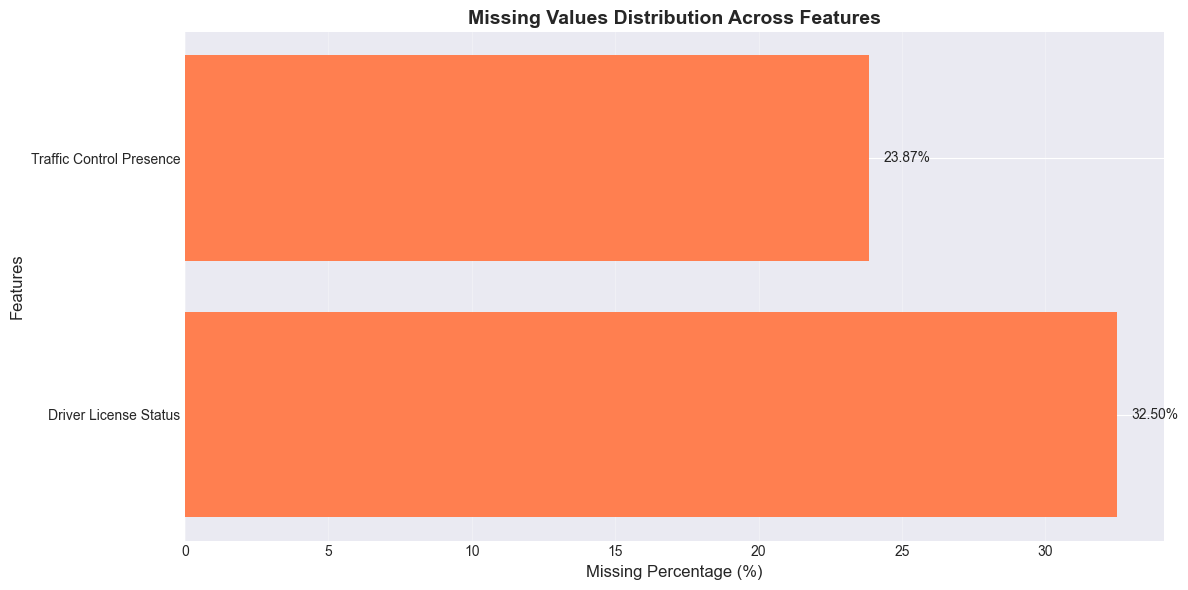

In [5]:
# ============================================================================
# CELL 5: Data Quality Assessment - Missing Values
# ============================================================================

print("="*80)
print("DATA QUALITY ASSESSMENT - MISSING VALUES")
print("="*80)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("\n⚠ COLUMNS WITH MISSING VALUES:")
    print("-" * 80)
    print(missing_data.to_string(index=False))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Missing Values Distribution Across Features', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    for i, v in enumerate(missing_data['Missing_Percentage']):
        plt.text(v + 0.5, i, f'{v:.2f}%', va='center')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ NO MISSING VALUES DETECTED!")
    print("  Dataset is complete with no null/NaN values.")

print("\n" + "="*80)


In [6]:
# ============================================================================
# CELL 6: Data Quality Assessment - Duplicates
# ============================================================================

print("="*80)
print("DATA QUALITY ASSESSMENT - DUPLICATE RECORDS")
print("="*80)

# Check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100

print(f"\nTotal Records: {len(df)}")
print(f"Duplicate Records: {duplicate_count}")
print(f"Duplicate Percentage: {duplicate_percentage:.2f}%")

if duplicate_count > 0:
    print("\n⚠ WARNING: Duplicate records found!")
    print("\nSample Duplicate Records:")
    print(df[df.duplicated(keep=False)].head(10))
    
    # Option to remove duplicates
    print("\n" + "-"*80)
    print("RECOMMENDATION: Consider removing duplicates in preprocessing phase.")
else:
    print("\n✓ NO DUPLICATE RECORDS FOUND!")

print("\n" + "="*80)


DATA QUALITY ASSESSMENT - DUPLICATE RECORDS

Total Records: 3000
Duplicate Records: 0
Duplicate Percentage: 0.00%

✓ NO DUPLICATE RECORDS FOUND!



In [7]:
# ============================================================================
# CELL 7: Data Quality Assessment - Unique Values per Feature
# ============================================================================

print("="*80)
print("UNIQUE VALUES DISTRIBUTION")
print("="*80)

unique_values = pd.DataFrame({
    'Feature': df.columns,
    'Unique_Count': [df[col].nunique() for col in df.columns],
    'Unique_Percentage': [(df[col].nunique() / len(df)) * 100 for col in df.columns],
    'Sample_Values': [str(df[col].unique()[:5].tolist()) for col in df.columns]
})

unique_values = unique_values.sort_values('Unique_Count', ascending=False)

print("\n")
print(unique_values.to_string(index=False))

# Identify high cardinality features
high_cardinality = unique_values[unique_values['Unique_Percentage'] > 50]
if len(high_cardinality) > 0:
    print("\n" + "-"*80)
    print("⚠ HIGH CARDINALITY FEATURES (>50% unique values):")
    print("-"*80)
    for _, row in high_cardinality.iterrows():
        print(f"  • {row['Feature']}: {row['Unique_Count']} unique values ({row['Unique_Percentage']:.2f}%)")

print("\n" + "="*80)


UNIQUE VALUES DISTRIBUTION


                    Feature  Unique_Count  Unique_Percentage                                                                 Sample_Values
                Time of Day          1263              42.10                                    ['1:46', '21:30', '5:37', '0:31', '11:21']
         Speed Limit (km/h)            91               3.03                                                        [61, 92, 120, 76, 115]
                 Driver Age            53               1.77                                                          [66, 60, 26, 34, 30]
                 State Name            32               1.07 ['Jammu and Kashmir', 'Uttar Pradesh', 'Chhattisgarh', 'Sikkim', 'Meghalaya']
                  City Name            28               0.93                       ['Unknown', 'Lucknow', 'Jodhpur', 'Kanpur', 'Tirupati']
                      Month            12               0.40                              ['May', 'January', 'June', 'August', 'November'

In [8]:
# ============================================================================
# CELL 8: Statistical Summary - Numerical Features
# ============================================================================

print("="*80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("="*80)

if len(numerical_features) > 0:
    # Basic statistics
    print("\n1. DESCRIPTIVE STATISTICS")
    print("-" * 80)
    numerical_stats = df[numerical_features].describe().T
    
    # Add additional statistics
    numerical_stats['median'] = df[numerical_features].median()
    numerical_stats['mode'] = df[numerical_features].mode().iloc[0]
    numerical_stats['skewness'] = df[numerical_features].skew()
    numerical_stats['kurtosis'] = df[numerical_features].kurtosis()
    numerical_stats['variance'] = df[numerical_features].var()
    
    # Reorder columns
    column_order = ['count', 'mean', 'median', 'mode', 'std', 'variance', 
                    'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
    numerical_stats = numerical_stats[[col for col in column_order if col in numerical_stats.columns]]
    
    print(numerical_stats)
    
    # Identify outliers using IQR method
    print("\n2. OUTLIER DETECTION (IQR Method)")
    print("-" * 80)
    
    outlier_summary = []
    for col in numerical_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Feature': col,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    print(outlier_df.to_string(index=False))
    
else:
    print("\n⚠ NO NUMERICAL FEATURES FOUND!")

print("\n" + "="*80)


STATISTICAL SUMMARY - NUMERICAL FEATURES

1. DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------
                     count  mean  median  mode   std  variance   min   25%   50%   75%    max  skewness  kurtosis
Speed Limit (km/h) 3000.00 74.94   75.00    35 26.77    716.37 30.00 51.00 75.00 99.00 120.00     -0.01     -1.24
Driver Age         3000.00 44.18   45.00    18 15.40    237.25 18.00 31.00 45.00 57.00  70.00     -0.04     -1.19

2. OUTLIER DETECTION (IQR Method)
--------------------------------------------------------------------------------
           Feature  Lower_Bound  Upper_Bound  Outlier_Count  Outlier_Percentage
Speed Limit (km/h)       -21.00       171.00              0                0.00
        Driver Age        -8.00        96.00              0                0.00



In [9]:
# ============================================================================
# CELL 9: Statistical Summary - Categorical Features
# ============================================================================

print("="*80)
print("STATISTICAL SUMMARY - CATEGORICAL FEATURES")
print("="*80)

if len(categorical_features) > 0:
    print("\n")
    
    categorical_summary = []
    for col in categorical_features:
        value_counts = df[col].value_counts()
        categorical_summary.append({
            'Feature': col,
            'Unique_Values': df[col].nunique(),
            'Most_Frequent': value_counts.index[0] if len(value_counts) > 0 else 'N/A',
            'Most_Frequent_Count': value_counts.values[0] if len(value_counts) > 0 else 0,
            'Most_Frequent_Percentage': (value_counts.values[0] / len(df)) * 100 if len(value_counts) > 0 else 0,
            'Least_Frequent': value_counts.index[-1] if len(value_counts) > 0 else 'N/A',
            'Least_Frequent_Count': value_counts.values[-1] if len(value_counts) > 0 else 0
        })
    
    cat_summary_df = pd.DataFrame(categorical_summary)
    print(cat_summary_df.to_string(index=False))
    
    # Detailed breakdown for key categorical features
    print("\n" + "-"*80)
    print("DETAILED VALUE DISTRIBUTION (Top 10 per feature)")
    print("-"*80)
    
    for col in categorical_features[:5]:  # Show first 5 categorical features
        print(f"\n• {col}:")
        value_dist = df[col].value_counts().head(10)
        for val, count in value_dist.items():
            percentage = (count / len(df)) * 100
            print(f"  {val:<30} | Count: {count:>5} | Percentage: {percentage:>6.2f}%")
else:
    print("\n⚠ NO CATEGORICAL FEATURES FOUND!")

print("\n" + "="*80)


STATISTICAL SUMMARY - CATEGORICAL FEATURES


                    Feature  Unique_Values      Most_Frequent  Most_Frequent_Count  Most_Frequent_Percentage   Least_Frequent  Least_Frequent_Count
                 State Name             32                Goa                  109                      3.63          Tripura                    76
                  City Name             28            Unknown                 2138                     71.27           Jaipur                    27
          Accident Severity              3              Minor                 1034                     34.47          Serious                   981
Number of Vehicles Involved              5                  1                  624                     20.80                2                   578
      Vehicle Type Involved              7              Truck                  449                     14.97              Car                   393
       Number of Casualties             11                  8      

TARGET VARIABLES IDENTIFICATION

1. CLASSIFICATION TARGET
--------------------------------------------------------------------------------
Target Variable: Accident Severity
Problem Type: Multi-class Classification

Class Distribution:
  • Fatal           | Count:   985 | Percentage:  32.83%
  • Minor           | Count:  1034 | Percentage:  34.47%
  • Serious         | Count:   981 | Percentage:  32.70%

Imbalance Ratio: 1.05:1
✓ Classes are relatively balanced.


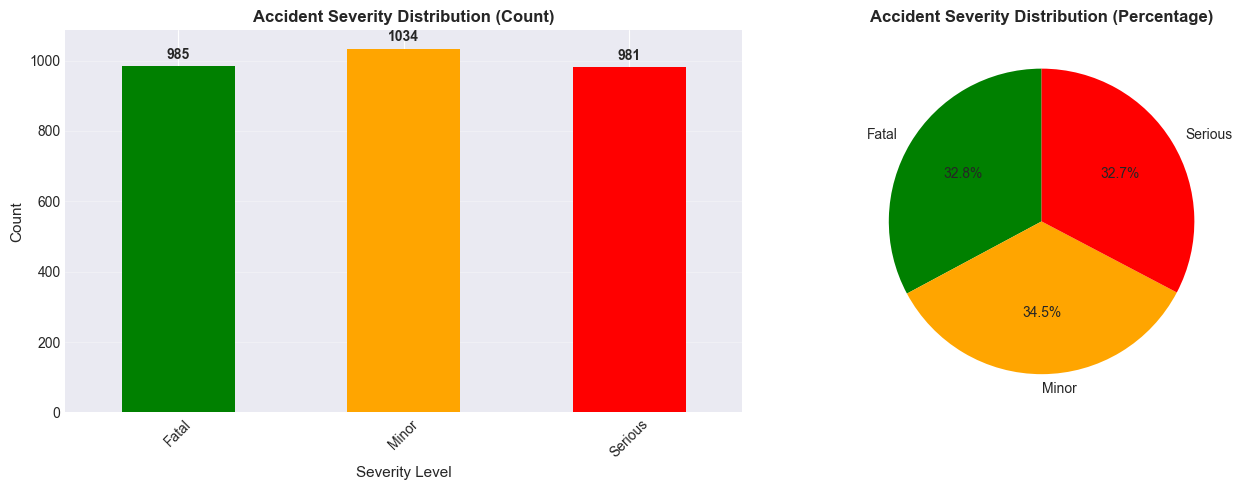


2. REGRESSION TARGETS
--------------------------------------------------------------------------------
Target Variable 1: Number of Casualties
Target Variable 2: Number of Fatalities
Problem Type: Multi-output Regression

Regression Target Statistics:
              Target  Mean  Median  Std  Min  Max  Range
Number of Casualties  5.07    5.00 3.21    0   10     10
Number of Fatalities  2.46    2.00 1.72    0    5      5


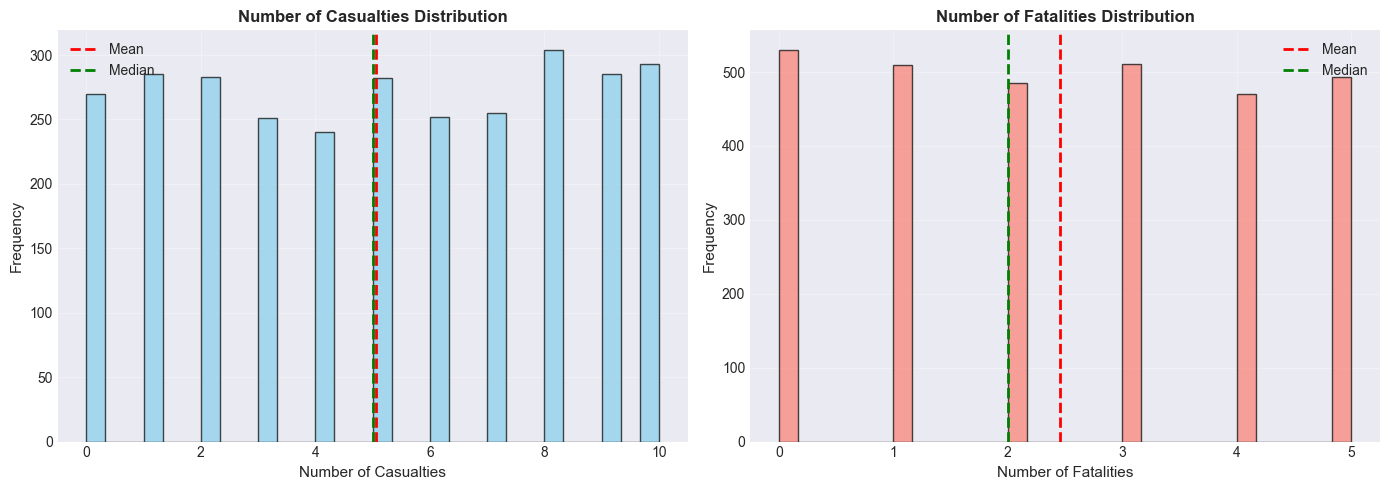


3. CLUSTERING TARGET
--------------------------------------------------------------------------------
Problem Type: Unsupervised Clustering
Objective: Discover accident patterns based on multi-factor combinations

Key Features for Clustering:
  • Weather Conditions
  • Road Type & Condition
  • Lighting Conditions
  • Vehicle Type
  • Time of Day
  • Driver Age & Gender
  • Speed Limit
  • Alcohol Involvement



In [10]:
# ============================================================================
# CELL 10: Target Variables Identification
# ============================================================================

print("="*80)
print("TARGET VARIABLES IDENTIFICATION")
print("="*80)

# Define target variables based on problem types
target_classification = 'Accident Severity'
target_regression_1 = 'Number of Casualties'
target_regression_2 = 'Number of Fatalities'

print("\n1. CLASSIFICATION TARGET")
print("-" * 80)
print(f"Target Variable: {target_classification}")
print(f"Problem Type: Multi-class Classification")

if target_classification in df.columns:
    severity_dist = df[target_classification].value_counts().sort_index()
    severity_percentage = (df[target_classification].value_counts(normalize=True) * 100).sort_index()
    
    print(f"\nClass Distribution:")
    for severity, count in severity_dist.items():
        percentage = severity_percentage[severity]
        print(f"  • {severity:<15} | Count: {count:>5} | Percentage: {percentage:>6.2f}%")
    
    # Check for class imbalance
    imbalance_ratio = severity_dist.max() / severity_dist.min()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 3:
        print("⚠ WARNING: Significant class imbalance detected!")
        print("  RECOMMENDATION: Consider using SMOTE, class weights, or stratified sampling.")
    else:
        print("✓ Classes are relatively balanced.")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    severity_dist.plot(kind='bar', ax=axes[0], color=['green', 'orange', 'red'])
    axes[0].set_title('Accident Severity Distribution (Count)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Severity Level', fontsize=11)
    axes[0].set_ylabel('Count', fontsize=11)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(severity_dist.values):
        axes[0].text(i, v + max(severity_dist.values)*0.02, str(v), ha='center', fontweight='bold')
    
    # Pie chart
    axes[1].pie(severity_dist.values, labels=severity_dist.index, autopct='%1.1f%%', 
                colors=['green', 'orange', 'red'], startangle=90)
    axes[1].set_title('Accident Severity Distribution (Percentage)', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("\n2. REGRESSION TARGETS")
print("-" * 80)
print(f"Target Variable 1: {target_regression_1}")
print(f"Target Variable 2: {target_regression_2}")
print(f"Problem Type: Multi-output Regression")

regression_stats = pd.DataFrame({
    'Target': [target_regression_1, target_regression_2],
    'Mean': [df[target_regression_1].mean(), df[target_regression_2].mean()],
    'Median': [df[target_regression_1].median(), df[target_regression_2].median()],
    'Std': [df[target_regression_1].std(), df[target_regression_2].std()],
    'Min': [df[target_regression_1].min(), df[target_regression_2].min()],
    'Max': [df[target_regression_1].max(), df[target_regression_2].max()],
    'Range': [df[target_regression_1].max() - df[target_regression_1].min(), 
              df[target_regression_2].max() - df[target_regression_2].min()]
})

print("\nRegression Target Statistics:")
print(regression_stats.to_string(index=False))

# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df[target_regression_1], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f'{target_regression_1} Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Casualties', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].axvline(df[target_regression_1].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df[target_regression_1].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(df[target_regression_2], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title(f'{target_regression_2} Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Fatalities', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].axvline(df[target_regression_2].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].axvline(df[target_regression_2].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n3. CLUSTERING TARGET")
print("-" * 80)
print("Problem Type: Unsupervised Clustering")
print("Objective: Discover accident patterns based on multi-factor combinations")
print("\nKey Features for Clustering:")
print("  • Weather Conditions")
print("  • Road Type & Condition")
print("  • Lighting Conditions")
print("  • Vehicle Type")
print("  • Time of Day")
print("  • Driver Age & Gender")
print("  • Speed Limit")
print("  • Alcohol Involvement")

print("\n" + "="*80)


In [11]:
# ============================================================================
# CELL 11: Comprehensive Data Quality Report
# ============================================================================

print("="*80)
print("COMPREHENSIVE DATA QUALITY REPORT")
print("="*80)

quality_report = {
    'Total Records': len(df),
    'Total Features': len(df.columns),
    'Categorical Features': len(categorical_features),
    'Numerical Features': len(numerical_features),
    'Temporal Features': len(temporal_features),
    'Memory Usage (MB)': df.memory_usage(deep=True).sum() / 1024**2,
    'Duplicate Records': df.duplicated().sum(),
    'Missing Values': df.isnull().sum().sum(),
    'Complete Records': len(df.dropna()),
    'Data Completeness (%)': (len(df.dropna()) / len(df)) * 100
}

print("\n📊 DATASET METRICS:")
print("-" * 80)
for key, value in quality_report.items():
    if isinstance(value, float):
        print(f"{key:<35} : {value:>10.2f}")
    else:
        print(f"{key:<35} : {value:>10}")

print("\n✓ PHASE 1: DATA UNDERSTANDING & INITIAL SETUP COMPLETED!")
print("="*80)


COMPREHENSIVE DATA QUALITY REPORT

📊 DATASET METRICS:
--------------------------------------------------------------------------------
Total Records                       :       3000
Total Features                      :         22
Categorical Features                :         16
Numerical Features                  :          2
Temporal Features                   :          4
Memory Usage (MB)                   :       3.01
Duplicate Records                   :          0
Missing Values                      :       1691
Complete Records                    :       1565
Data Completeness (%)               :      52.17

✓ PHASE 1: DATA UNDERSTANDING & INITIAL SETUP COMPLETED!


In [12]:
# ============================================================================
# CELL 12: Save Feature Lists for Next Phases
# ============================================================================

# Save feature classifications for use in subsequent phases
feature_types = {
    'categorical_features': categorical_features,
    'numerical_features': numerical_features,
    'temporal_features': temporal_features,
    'target_classification': target_classification,
    'target_regression': [target_regression_1, target_regression_2]
}

print("="*80)
print("FEATURE LISTS SAVED FOR NEXT PHASES")
print("="*80)
print("\n✓ Variables saved in memory:")
print("  • categorical_features")
print("  • numerical_features")
print("  • temporal_features")
print("  • target_classification")
print("  • target_regression")
print("\nThese will be used in Phase 2: EDA")
print("="*80)


FEATURE LISTS SAVED FOR NEXT PHASES

✓ Variables saved in memory:
  • categorical_features
  • numerical_features
  • temporal_features
  • target_classification
  • target_regression

These will be used in Phase 2: EDA


EDA - UNIVARIATE ANALYSIS: NUMERICAL FEATURES


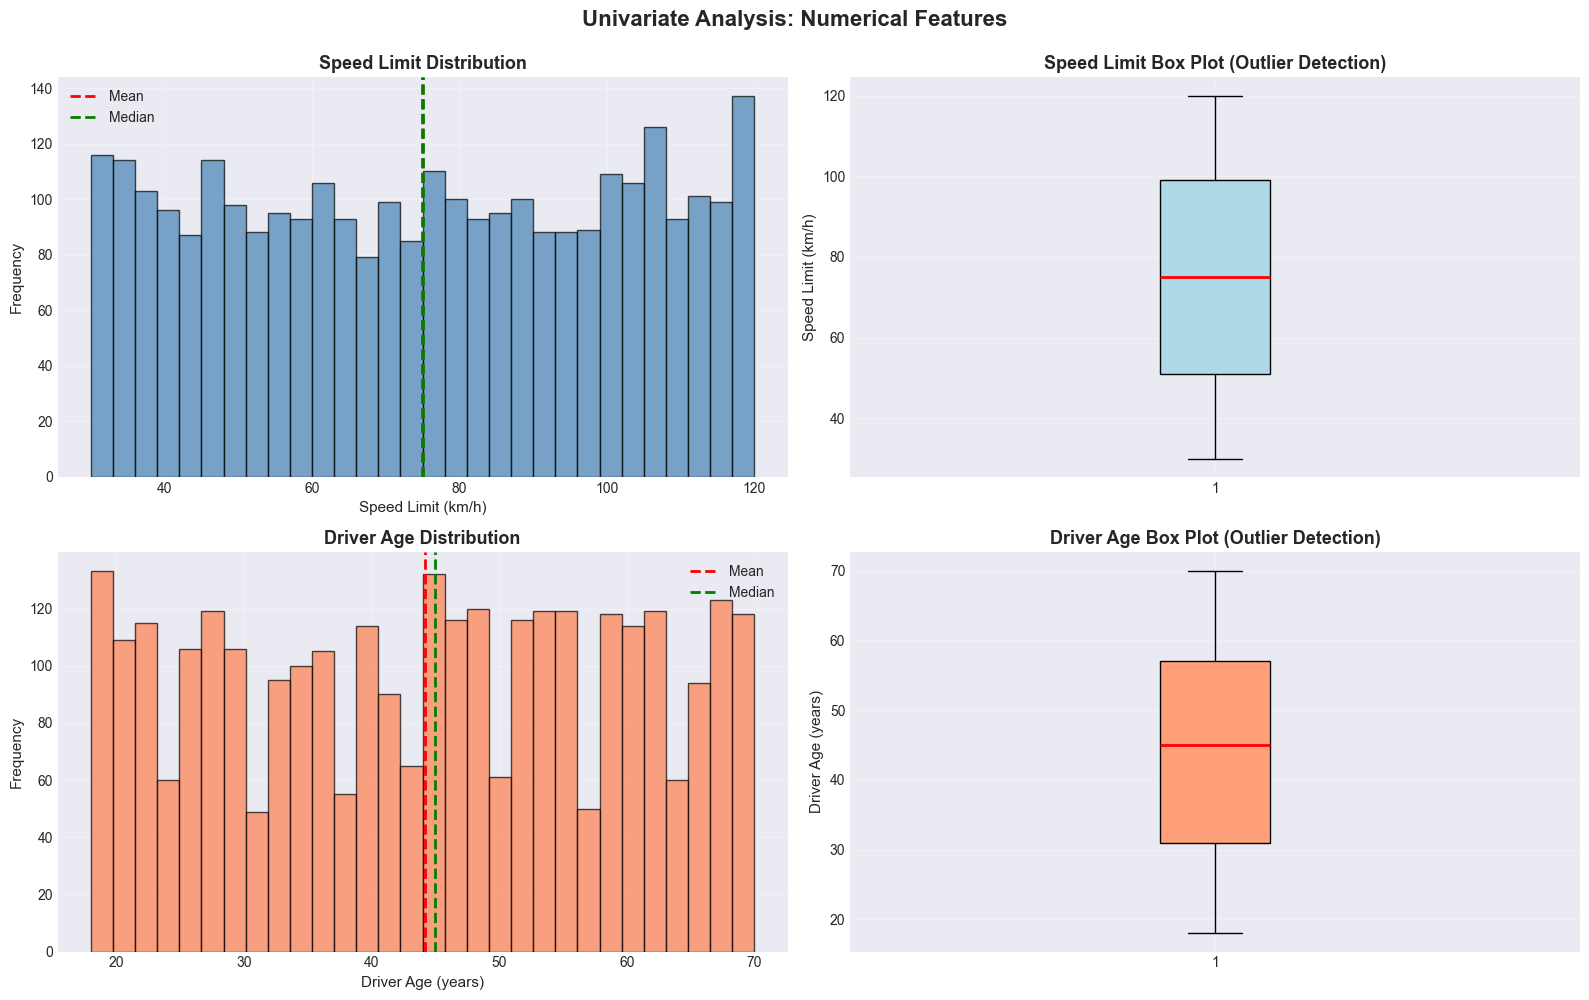


✓ Univariate analysis for numerical features completed!


In [13]:
# ============================================================================
# CELL 13: EDA - Univariate Analysis (Numerical Features)
# ============================================================================

print("="*80)
print("EDA - UNIVARIATE ANALYSIS: NUMERICAL FEATURES")
print("="*80)

# Distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Univariate Analysis: Numerical Features', fontsize=16, fontweight='bold', y=0.995)

# Speed Limit Distribution
axes[0, 0].hist(df['Speed Limit (km/h)'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Speed Limit Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Speed Limit (km/h)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].axvline(df['Speed Limit (km/h)'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df['Speed Limit (km/h)'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Speed Limit Box Plot
bp1 = axes[0, 1].boxplot(df['Speed Limit (km/h)'], vert=True, patch_artist=True, 
                           boxprops=dict(facecolor='lightblue', color='black'),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='black'),
                           capprops=dict(color='black'))
axes[0, 1].set_title('Speed Limit Box Plot (Outlier Detection)', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Speed Limit (km/h)', fontsize=11)
axes[0, 1].grid(alpha=0.3)

# Driver Age Distribution
axes[1, 0].hist(df['Driver Age'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Driver Age Distribution', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Driver Age (years)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].axvline(df['Driver Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 0].axvline(df['Driver Age'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Driver Age Box Plot
bp2 = axes[1, 1].boxplot(df['Driver Age'], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightsalmon', color='black'),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='black'),
                           capprops=dict(color='black'))
axes[1, 1].set_title('Driver Age Box Plot (Outlier Detection)', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Driver Age (years)', fontsize=11)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Univariate analysis for numerical features completed!")
print("="*80)


EDA - UNIVARIATE ANALYSIS: TARGET VARIABLES (Casualties & Fatalities)


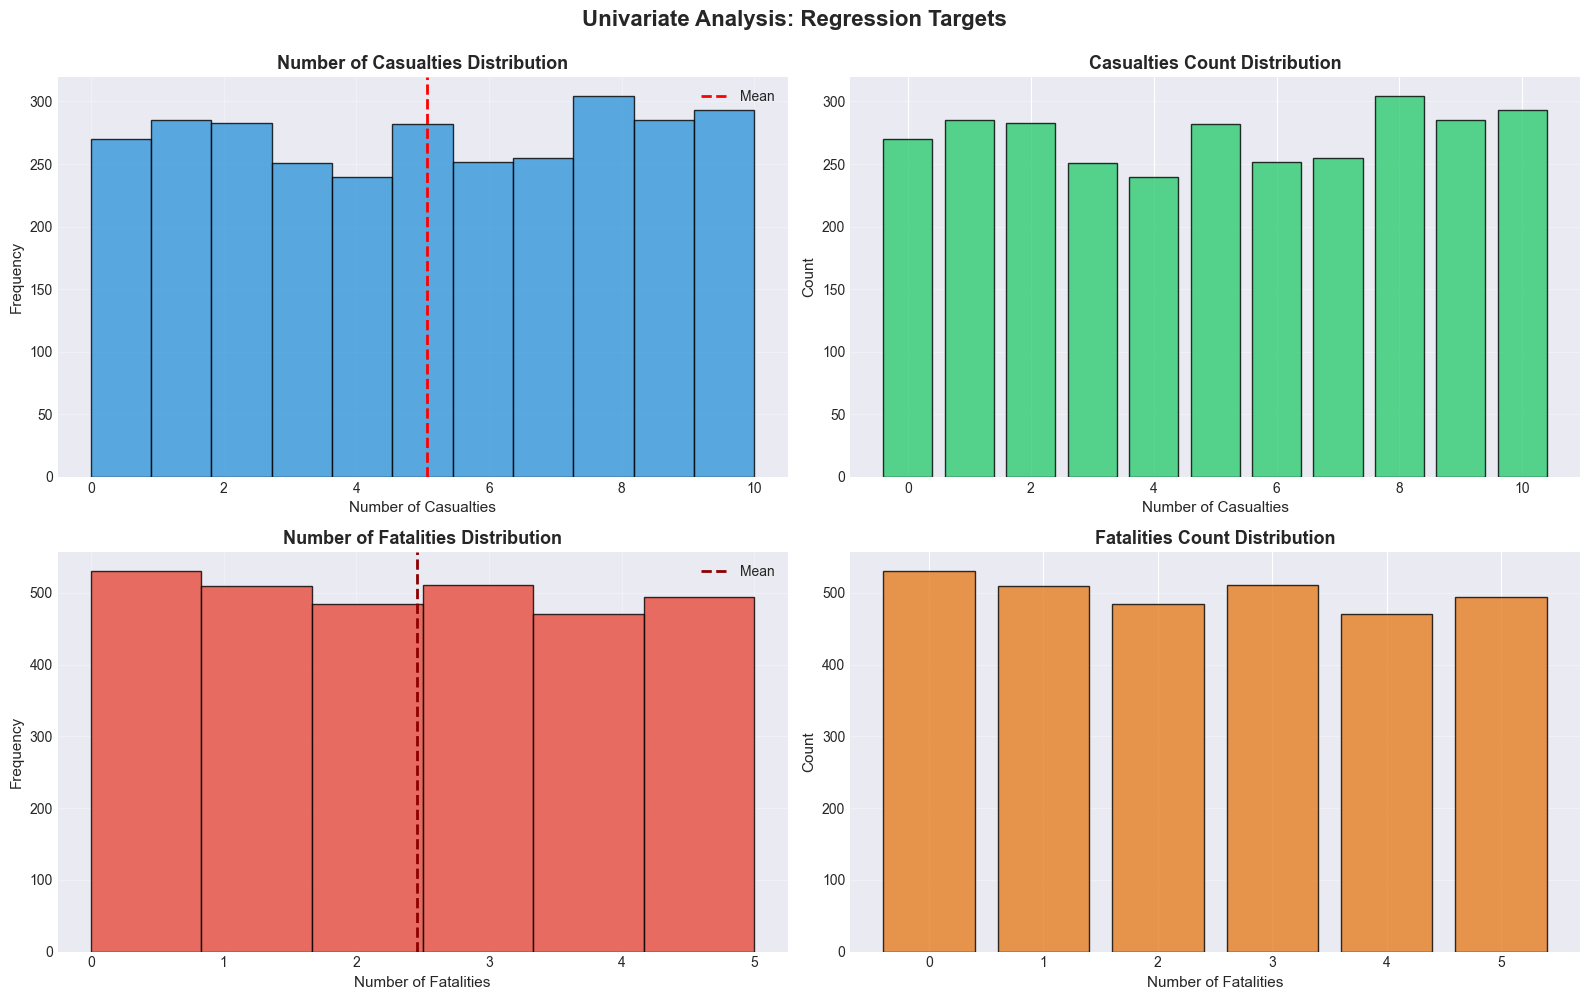


✓ Target variable univariate analysis completed!


In [14]:
# ============================================================================
# CELL 14: EDA - Univariate Analysis (Target Variables)
# ============================================================================

print("="*80)
print("EDA - UNIVARIATE ANALYSIS: TARGET VARIABLES (Casualties & Fatalities)")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Univariate Analysis: Regression Targets', fontsize=16, fontweight='bold', y=0.995)

# Number of Casualties - Histogram
axes[0, 0].hist(df['Number of Casualties'], bins=11, color='#3498db', edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Number of Casualties Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Number of Casualties', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].axvline(df['Number of Casualties'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Number of Casualties - Count Plot
casualty_counts = df['Number of Casualties'].value_counts().sort_index()
axes[0, 1].bar(casualty_counts.index, casualty_counts.values, color='#2ecc71', edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Casualties Count Distribution', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Number of Casualties', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].grid(alpha=0.3, axis='y')

# Number of Fatalities - Histogram
axes[1, 0].hist(df['Number of Fatalities'], bins=6, color='#e74c3c', edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Number of Fatalities Distribution', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Number of Fatalities', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].axvline(df['Number of Fatalities'].mean(), color='darkred', linestyle='--', linewidth=2, label='Mean')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Number of Fatalities - Count Plot
fatality_counts = df['Number of Fatalities'].value_counts().sort_index()
axes[1, 1].bar(fatality_counts.index, fatality_counts.values, color='#e67e22', edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Fatalities Count Distribution', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Number of Fatalities', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Target variable univariate analysis completed!")
print("="*80)


EDA - UNIVARIATE ANALYSIS: CATEGORICAL FEATURES


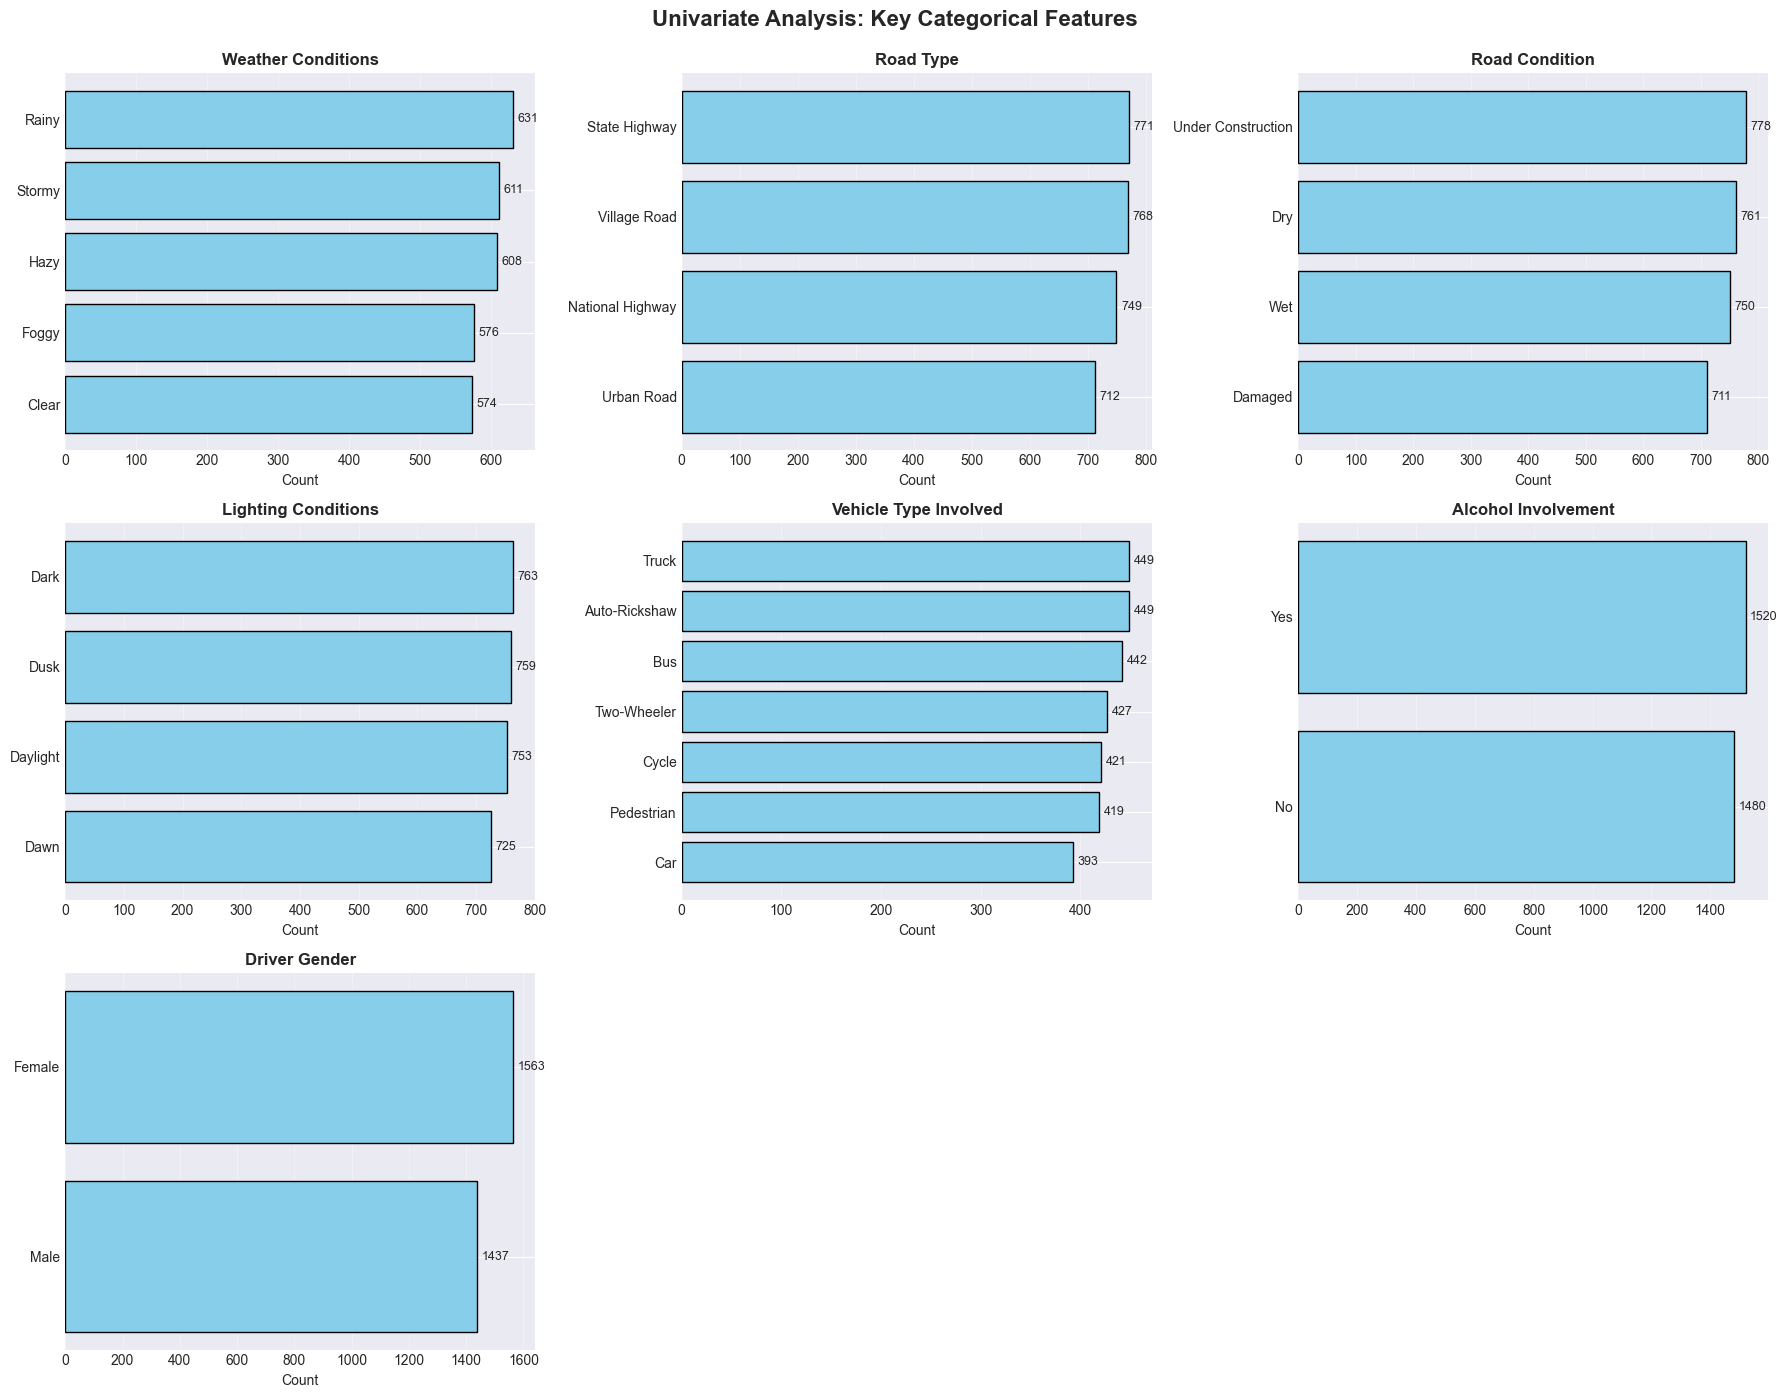


✓ Categorical features univariate analysis completed!


In [15]:
# ============================================================================
# CELL 15: EDA - Univariate Analysis (Top Categorical Features)
# ============================================================================

print("="*80)
print("EDA - UNIVARIATE ANALYSIS: CATEGORICAL FEATURES")
print("="*80)

# Select key categorical features (exclude high cardinality ones)
key_categorical = ['Weather Conditions', 'Road Type', 'Road Condition', 
                   'Lighting Conditions', 'Vehicle Type Involved', 
                   'Alcohol Involvement', 'Driver Gender']

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Univariate Analysis: Key Categorical Features', fontsize=16, fontweight='bold', y=0.995)

for idx, feature in enumerate(key_categorical):
    row = idx // 3
    col = idx % 3
    
    value_counts = df[feature].value_counts().head(10)
    
    axes[row, col].barh(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Count', fontsize=10)
    axes[row, col].invert_yaxis()
    axes[row, col].grid(alpha=0.3, axis='x')
    
    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[row, col].text(v + max(value_counts.values)*0.01, i, str(v), va='center', fontsize=9)

# Hide unused subplots
for idx in range(len(key_categorical), 9):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Categorical features univariate analysis completed!")
print("="*80)


EDA - TEMPORAL ANALYSIS


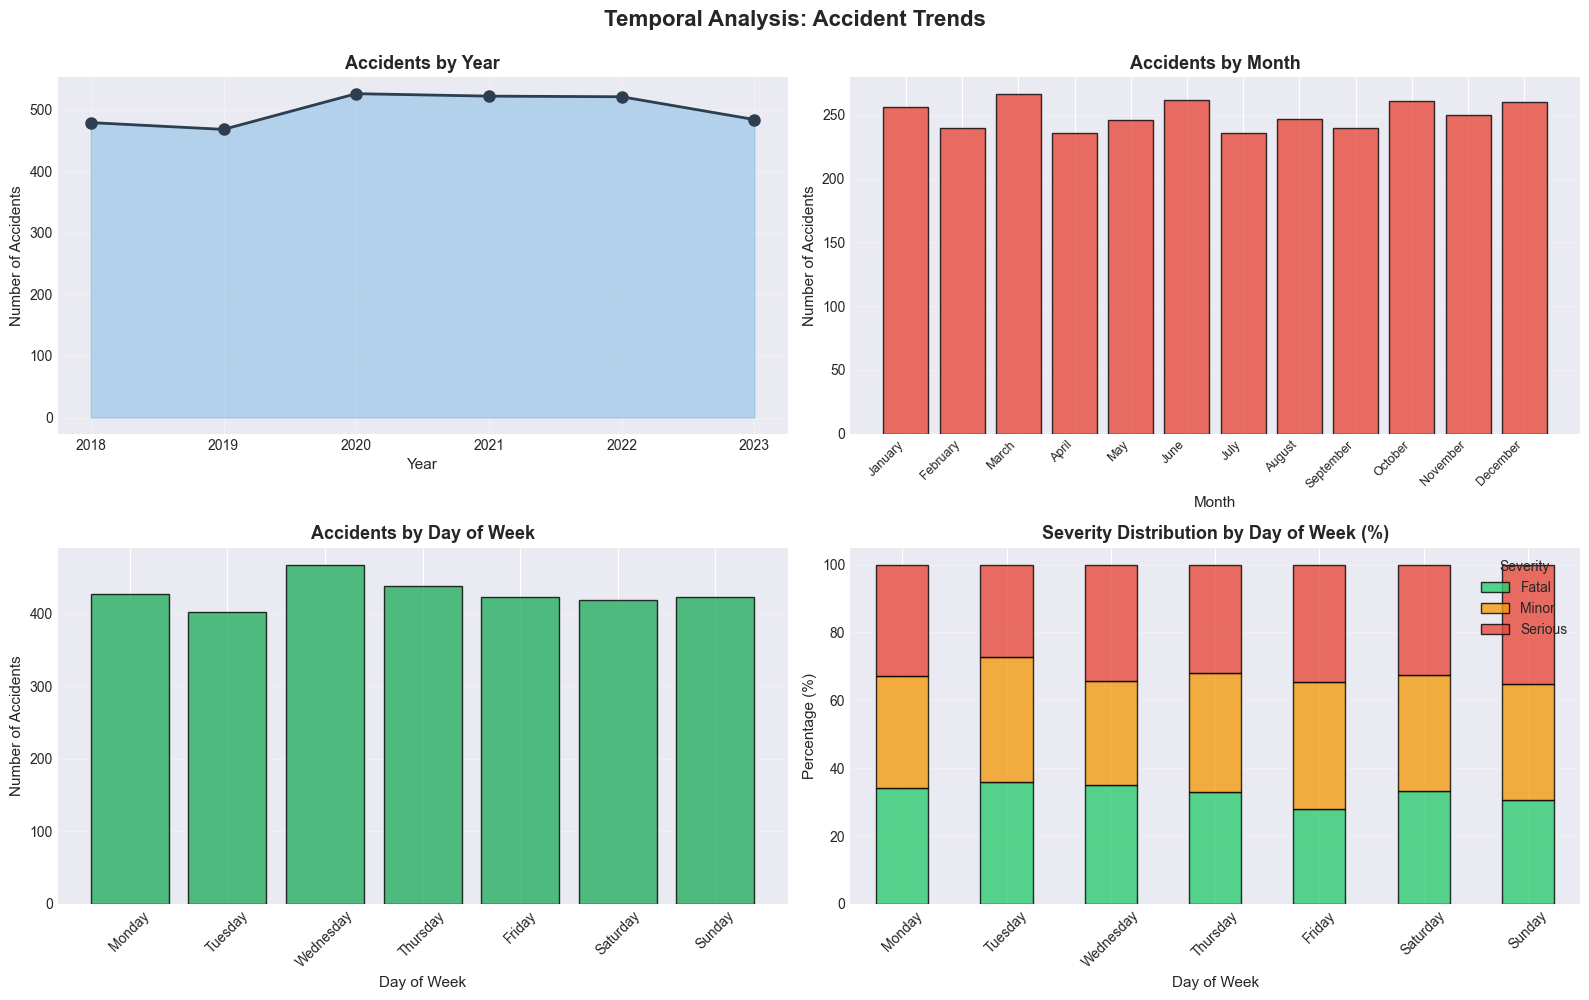


✓ Temporal analysis completed!


In [16]:
# ============================================================================
# CELL 16: EDA - Temporal Analysis (Year, Month, Day of Week)
# ============================================================================

print("="*80)
print("EDA - TEMPORAL ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temporal Analysis: Accident Trends', fontsize=16, fontweight='bold', y=0.995)

# Year-wise distribution
year_counts = df['Year'].value_counts().sort_index()
axes[0, 0].plot(year_counts.index, year_counts.values, marker='o', color='#2c3e50', linewidth=2, markersize=8)
axes[0, 0].fill_between(year_counts.index, year_counts.values, alpha=0.3, color='#3498db')
axes[0, 0].set_title('Accidents by Year', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=11)
axes[0, 0].set_ylabel('Number of Accidents', fontsize=11)
axes[0, 0].grid(alpha=0.3)

# Month-wise distribution
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['Month'].value_counts().reindex(month_order, fill_value=0)
axes[0, 1].bar(range(len(month_counts)), month_counts.values, color='#e74c3c', edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Accidents by Month', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Number of Accidents', fontsize=11)
axes[0, 1].set_xticks(range(len(month_order)))
axes[0, 1].set_xticklabels(month_order, rotation=45, ha='right', fontsize=9)
axes[0, 1].grid(alpha=0.3, axis='y')

# Day of Week distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day of Week'].value_counts().reindex(day_order, fill_value=0)
axes[1, 0].bar(day_counts.index, day_counts.values, color='#27ae60', edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Accidents by Day of Week', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Day of Week', fontsize=11)
axes[1, 0].set_ylabel('Number of Accidents', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3, axis='y')

# Severity by Day of Week
severity_day = pd.crosstab(df['Day of Week'], df['Accident Severity'], normalize='index') * 100
severity_day = severity_day.reindex(day_order)
severity_day.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                  color=['#2ecc71', '#f39c12', '#e74c3c'], 
                  edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Severity Distribution by Day of Week (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Day of Week', fontsize=11)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].legend(title='Severity', loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Temporal analysis completed!")
print("="*80)


EDA - BIVARIATE ANALYSIS: SEVERITY VS KEY FEATURES


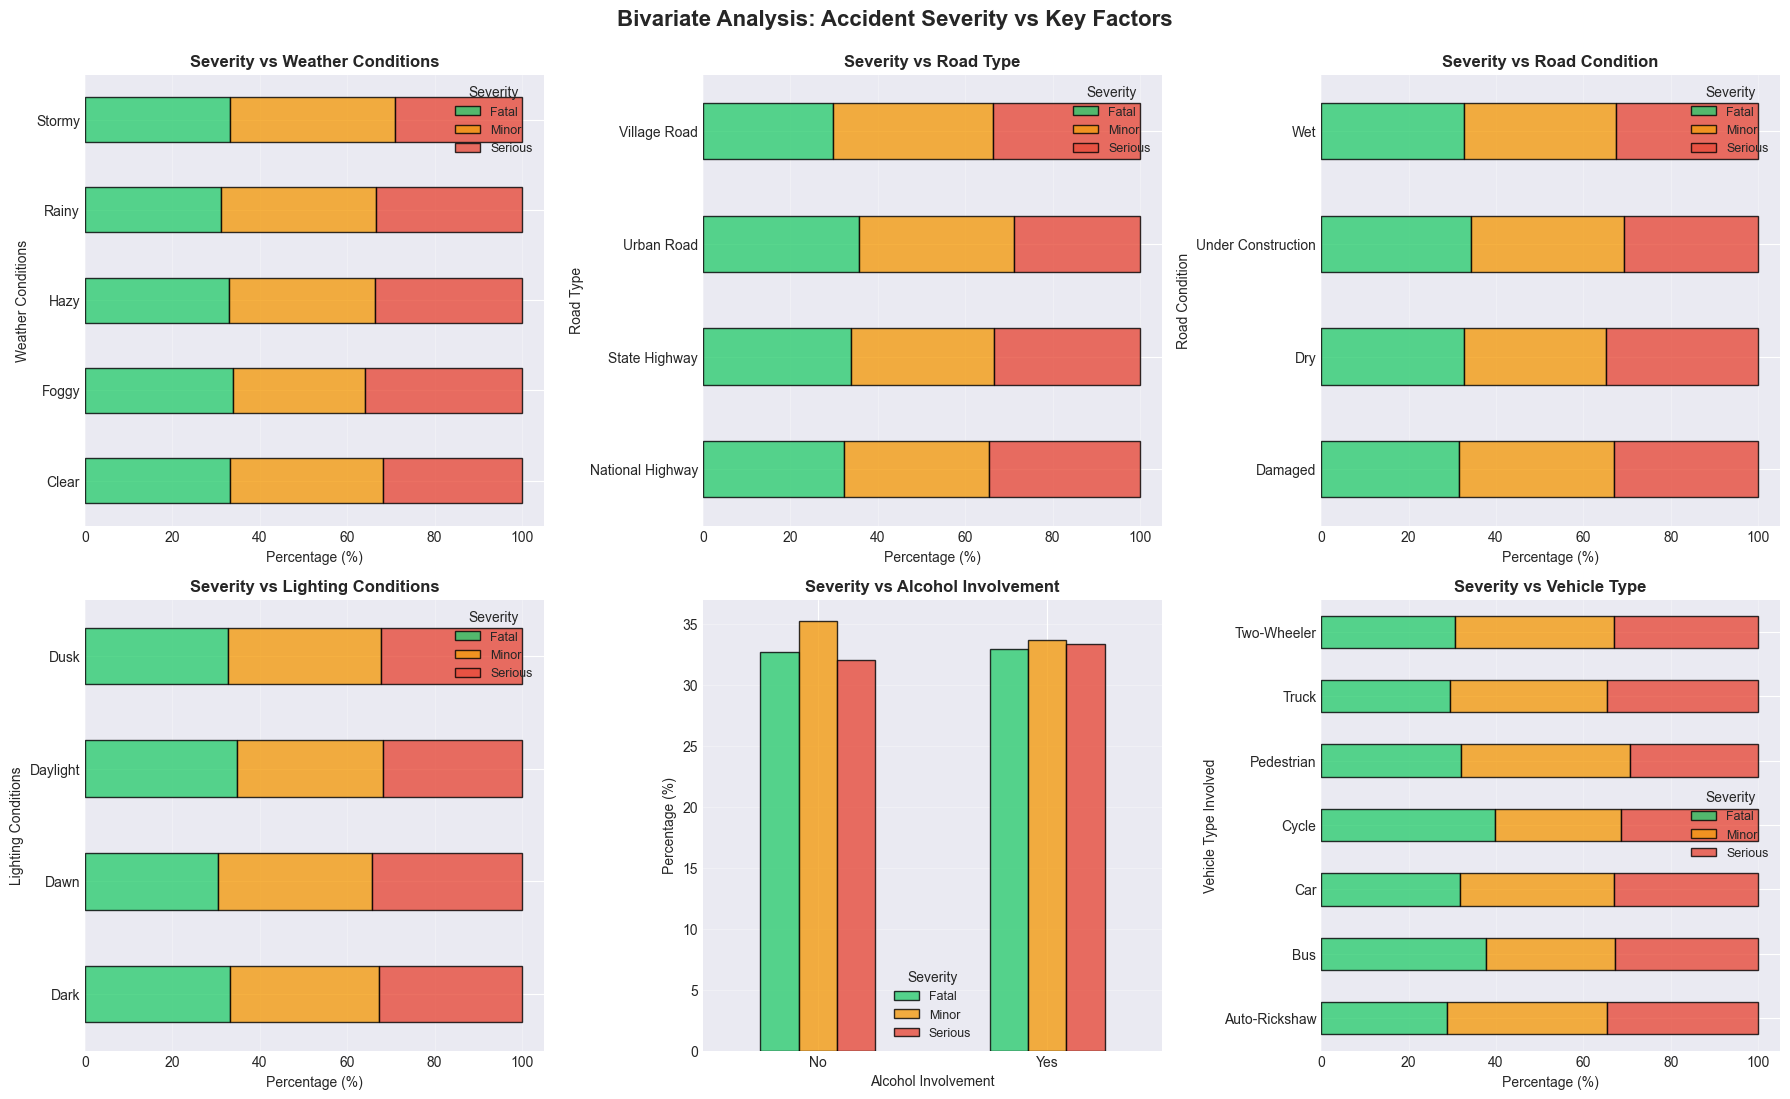


✓ Bivariate analysis (Severity vs Features) completed!


In [17]:
# ============================================================================
# CELL 17: EDA - Bivariate Analysis (Severity vs Key Features)
# ============================================================================

print("="*80)
print("EDA - BIVARIATE ANALYSIS: SEVERITY VS KEY FEATURES")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('Bivariate Analysis: Accident Severity vs Key Factors', fontsize=16, fontweight='bold', y=0.995)

# Severity vs Weather Conditions
weather_severity = pd.crosstab(df['Weather Conditions'], df['Accident Severity'], normalize='index') * 100
weather_severity.plot(kind='barh', stacked=True, ax=axes[0, 0], 
                      color=['#2ecc71', '#f39c12', '#e74c3c'], 
                      edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Severity vs Weather Conditions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Percentage (%)', fontsize=10)
axes[0, 0].legend(title='Severity', loc='best', fontsize=9)
axes[0, 0].grid(alpha=0.3, axis='x')

# Severity vs Road Type
road_severity = pd.crosstab(df['Road Type'], df['Accident Severity'], normalize='index') * 100
road_severity.plot(kind='barh', stacked=True, ax=axes[0, 1], 
                   color=['#2ecc71', '#f39c12', '#e74c3c'], 
                   edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Severity vs Road Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Percentage (%)', fontsize=10)
axes[0, 1].legend(title='Severity', loc='best', fontsize=9)
axes[0, 1].grid(alpha=0.3, axis='x')

# Severity vs Road Condition
road_cond_severity = pd.crosstab(df['Road Condition'], df['Accident Severity'], normalize='index') * 100
road_cond_severity.plot(kind='barh', stacked=True, ax=axes[0, 2], 
                        color=['#2ecc71', '#f39c12', '#e74c3c'], 
                        edgecolor='black', alpha=0.8)
axes[0, 2].set_title('Severity vs Road Condition', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Percentage (%)', fontsize=10)
axes[0, 2].legend(title='Severity', loc='best', fontsize=9)
axes[0, 2].grid(alpha=0.3, axis='x')

# Severity vs Lighting Conditions
lighting_severity = pd.crosstab(df['Lighting Conditions'], df['Accident Severity'], normalize='index') * 100
lighting_severity.plot(kind='barh', stacked=True, ax=axes[1, 0], 
                       color=['#2ecc71', '#f39c12', '#e74c3c'], 
                       edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Severity vs Lighting Conditions', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Percentage (%)', fontsize=10)
axes[1, 0].legend(title='Severity', loc='best', fontsize=9)
axes[1, 0].grid(alpha=0.3, axis='x')

# Severity vs Alcohol Involvement
alcohol_severity = pd.crosstab(df['Alcohol Involvement'], df['Accident Severity'], normalize='index') * 100
alcohol_severity.plot(kind='bar', stacked=False, ax=axes[1, 1], 
                      color=['#2ecc71', '#f39c12', '#e74c3c'], 
                      edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Severity vs Alcohol Involvement', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)', fontsize=10)
axes[1, 1].legend(title='Severity', loc='best', fontsize=9)
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(alpha=0.3, axis='y')

# Severity vs Vehicle Type
vehicle_severity = pd.crosstab(df['Vehicle Type Involved'], df['Accident Severity'], normalize='index') * 100
vehicle_severity.plot(kind='barh', stacked=True, ax=axes[1, 2], 
                      color=['#2ecc71', '#f39c12', '#e74c3c'], 
                      edgecolor='black', alpha=0.8)
axes[1, 2].set_title('Severity vs Vehicle Type', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Percentage (%)', fontsize=10)
axes[1, 2].legend(title='Severity', loc='best', fontsize=9)
axes[1, 2].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n✓ Bivariate analysis (Severity vs Features) completed!")
print("="*80)


EDA - BIVARIATE ANALYSIS: NUMERICAL FEATURES VS SEVERITY


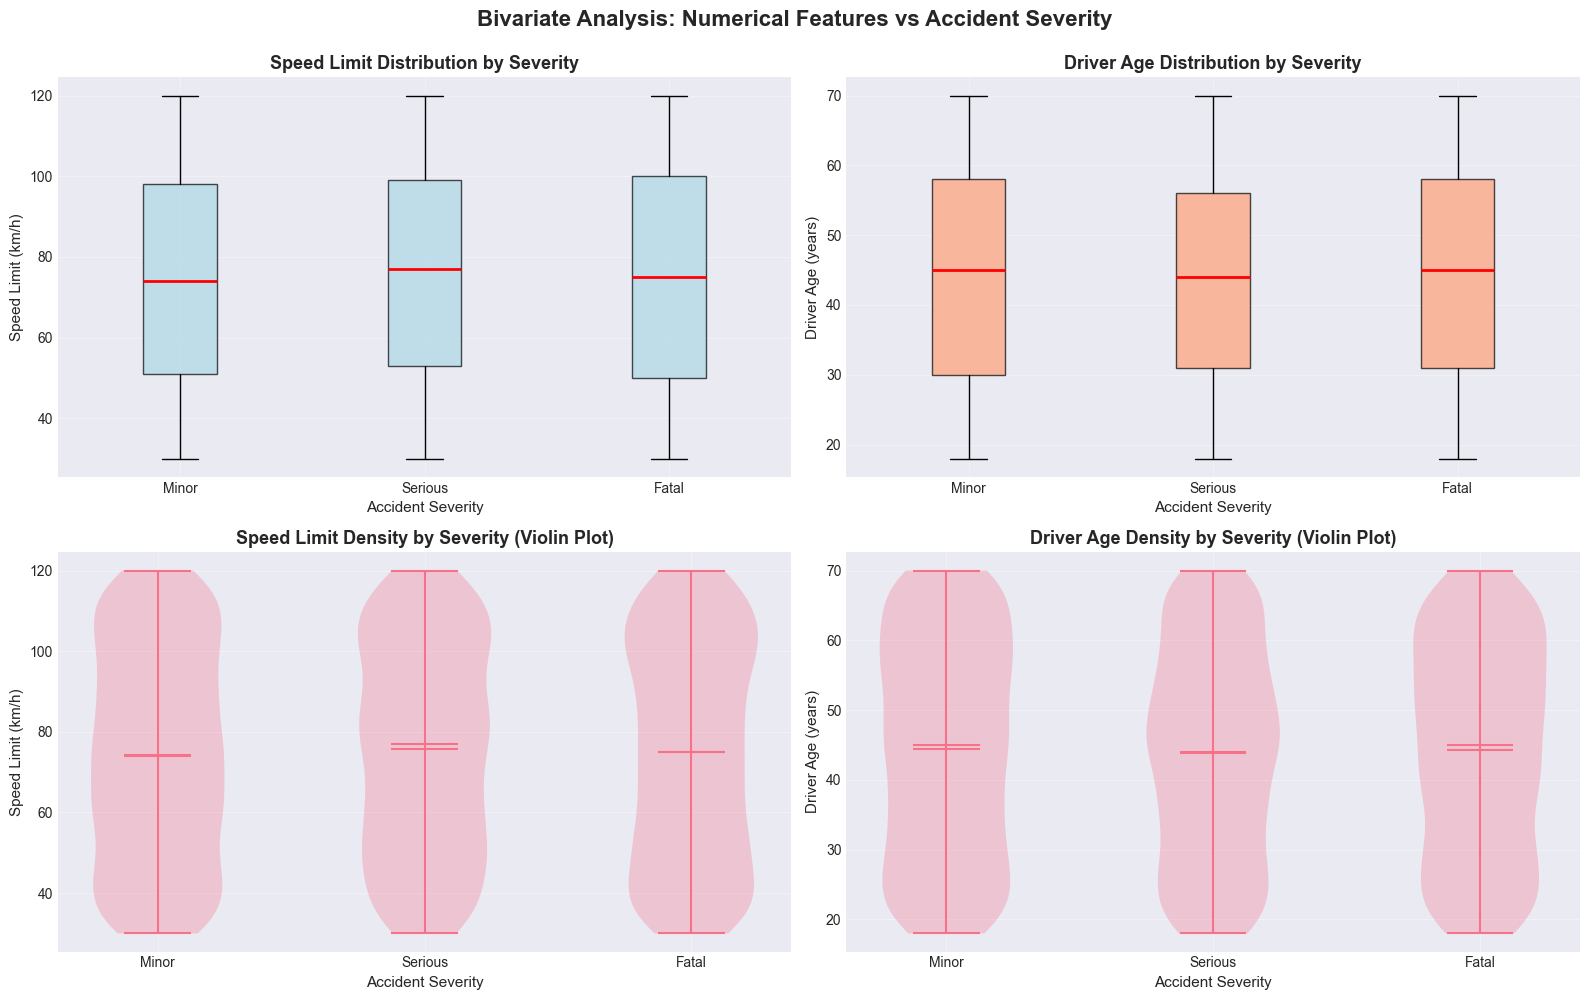


✓ Numerical vs Severity bivariate analysis completed!


In [18]:
# ============================================================================
# CELL 18: EDA - Bivariate Analysis (Numerical vs Severity)
# ============================================================================

print("="*80)
print("EDA - BIVARIATE ANALYSIS: NUMERICAL FEATURES VS SEVERITY")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Bivariate Analysis: Numerical Features vs Accident Severity', fontsize=16, fontweight='bold', y=0.995)

# Speed Limit by Severity - Box Plot
severity_order = ['Minor', 'Serious', 'Fatal']
df_sorted = df.copy()
df_sorted['Accident Severity'] = pd.Categorical(df_sorted['Accident Severity'], categories=severity_order, ordered=True)

data_speed = [df_sorted[df_sorted['Accident Severity'] == sev]['Speed Limit (km/h)'].dropna() for sev in severity_order]
bp1 = axes[0, 0].boxplot(data_speed, labels=severity_order, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
axes[0, 0].set_title('Speed Limit Distribution by Severity', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Accident Severity', fontsize=11)
axes[0, 0].set_ylabel('Speed Limit (km/h)', fontsize=11)
axes[0, 0].grid(alpha=0.3)

# Driver Age by Severity - Box Plot
data_age = [df_sorted[df_sorted['Accident Severity'] == sev]['Driver Age'].dropna() for sev in severity_order]
bp2 = axes[0, 1].boxplot(data_age, labels=severity_order, patch_artist=True,
                          boxprops=dict(facecolor='lightsalmon', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_title('Driver Age Distribution by Severity', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Accident Severity', fontsize=11)
axes[0, 1].set_ylabel('Driver Age (years)', fontsize=11)
axes[0, 1].grid(alpha=0.3)

# Speed Limit by Severity - Violin Plot
parts = axes[1, 0].violinplot(data_speed, positions=[1, 2, 3], showmeans=True, showmedians=True)
axes[1, 0].set_title('Speed Limit Density by Severity (Violin Plot)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Accident Severity', fontsize=11)
axes[1, 0].set_ylabel('Speed Limit (km/h)', fontsize=11)
axes[1, 0].set_xticks([1, 2, 3])
axes[1, 0].set_xticklabels(severity_order)
axes[1, 0].grid(alpha=0.3)

# Driver Age by Severity - Violin Plot
parts2 = axes[1, 1].violinplot(data_age, positions=[1, 2, 3], showmeans=True, showmedians=True)
axes[1, 1].set_title('Driver Age Density by Severity (Violin Plot)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Accident Severity', fontsize=11)
axes[1, 1].set_ylabel('Driver Age (years)', fontsize=11)
axes[1, 1].set_xticks([1, 2, 3])
axes[1, 1].set_xticklabels(severity_order)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Numerical vs Severity bivariate analysis completed!")
print("="*80)


EDA - CORRELATION ANALYSIS


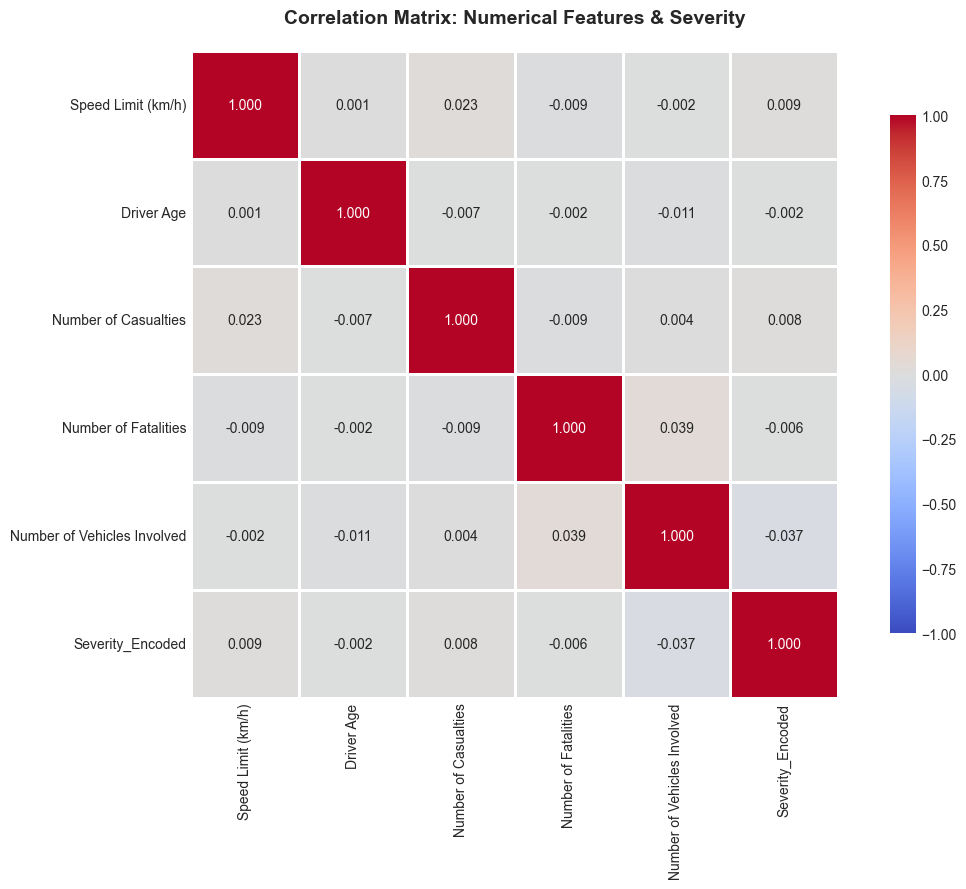


📊 CORRELATION INSIGHTS:
--------------------------------------------------------------------------------

Top Positive Correlations with Severity:
  • Speed Limit (km/h)                  :   0.009
  • Number of Casualties                :   0.008
  • Driver Age                          :  -0.002

Top Negative Correlations with Severity:
  • Driver Age                          :  -0.002
  • Number of Fatalities                :  -0.006
  • Number of Vehicles Involved         :  -0.037

✓ Correlation analysis completed!


In [19]:
# ============================================================================
# CELL 19: EDA - Correlation Analysis (Numerical Features)
# ============================================================================

print("="*80)
print("EDA - CORRELATION ANALYSIS")
print("="*80)

# Prepare data for correlation (encode target variable)
df_corr = df.copy()

# Encode Accident Severity
severity_map = {'Minor': 0, 'Serious': 1, 'Fatal': 2}
df_corr['Severity_Encoded'] = df_corr['Accident Severity'].map(severity_map)

# Select numerical features + encoded target
corr_features = ['Speed Limit (km/h)', 'Driver Age', 'Number of Casualties', 
                 'Number of Fatalities', 'Number of Vehicles Involved', 'Severity_Encoded']

correlation_matrix = df_corr[corr_features].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Correlation Matrix: Numerical Features & Severity', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation insights
print("\n📊 CORRELATION INSIGHTS:")
print("-" * 80)
print("\nTop Positive Correlations with Severity:")
severity_corr = correlation_matrix['Severity_Encoded'].drop('Severity_Encoded').sort_values(ascending=False)
for feature, corr_val in severity_corr.head(3).items():
    print(f"  • {feature:<35} : {corr_val:>7.3f}")

print("\nTop Negative Correlations with Severity:")
for feature, corr_val in severity_corr.tail(3).items():
    print(f"  • {feature:<35} : {corr_val:>7.3f}")

print("\n✓ Correlation analysis completed!")
print("="*80)


EDA - GEOSPATIAL ANALYSIS: STATE-WISE ACCIDENTS


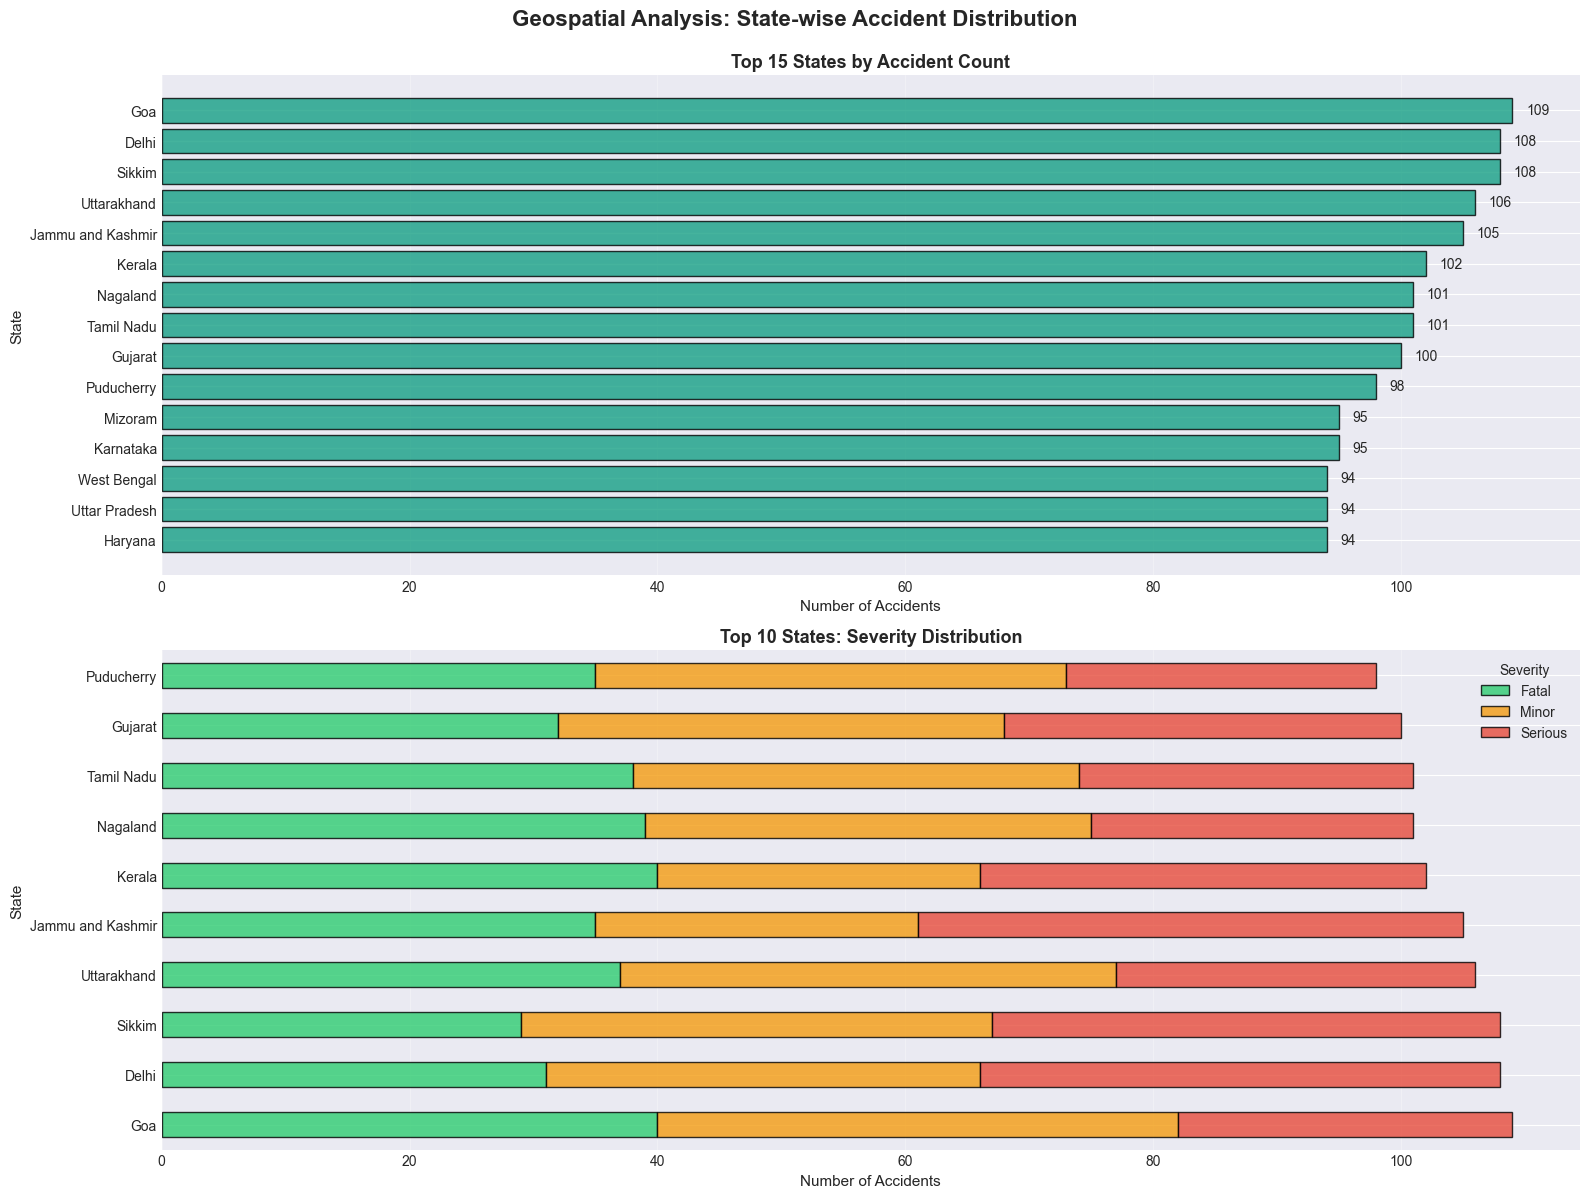


✓ Geospatial analysis completed!


In [20]:
# ============================================================================
# CELL 20: EDA - Geospatial Analysis (State-wise Distribution)
# ============================================================================

print("="*80)
print("EDA - GEOSPATIAL ANALYSIS: STATE-WISE ACCIDENTS")
print("="*80)

# Top 15 states with most accidents
state_counts = df['State Name'].value_counts().head(15)

fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Geospatial Analysis: State-wise Accident Distribution', fontsize=16, fontweight='bold', y=0.995)

# State-wise accident count
axes[0].barh(state_counts.index, state_counts.values, color='#16a085', edgecolor='black', alpha=0.8)
axes[0].set_title('Top 15 States by Accident Count', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Number of Accidents', fontsize=11)
axes[0].set_ylabel('State', fontsize=11)
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(state_counts.values):
    axes[0].text(v + max(state_counts.values)*0.01, i, str(v), va='center', fontsize=10)

# State-wise severity distribution (Top 10 states)
top_states = state_counts.head(10).index
state_severity = pd.crosstab(df[df['State Name'].isin(top_states)]['State Name'], 
                              df[df['State Name'].isin(top_states)]['Accident Severity'])
state_severity = state_severity.reindex(top_states)

state_severity.plot(kind='barh', stacked=True, ax=axes[1], 
                    color=['#2ecc71', '#f39c12', '#e74c3c'], 
                    edgecolor='black', alpha=0.8)
axes[1].set_title('Top 10 States: Severity Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Accidents', fontsize=11)
axes[1].set_ylabel('State', fontsize=11)
axes[1].legend(title='Severity', loc='best')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n✓ Geospatial analysis completed!")
print("="*80)


EDA - MULTIVARIATE ANALYSIS: PAIRPLOT


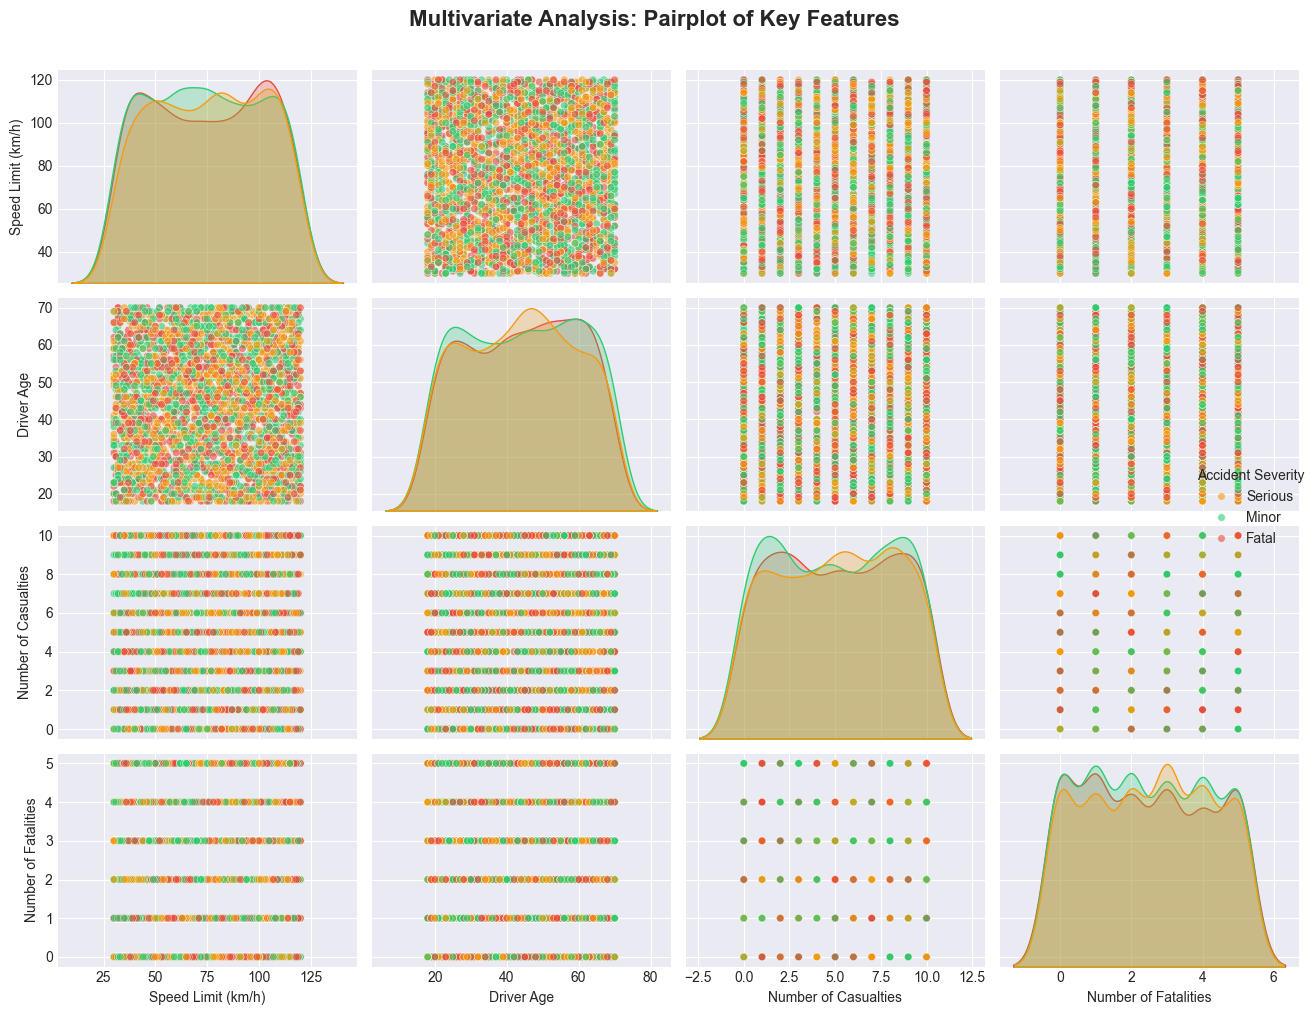


✓ Multivariate pairplot analysis completed!


In [21]:
# ============================================================================
# CELL 21: EDA - Multivariate Analysis (Pairplot for Key Features)
# ============================================================================

print("="*80)
print("EDA - MULTIVARIATE ANALYSIS: PAIRPLOT")
print("="*80)

# Select key features for pairplot
pairplot_features = ['Speed Limit (km/h)', 'Driver Age', 'Number of Casualties', 
                     'Number of Fatalities', 'Accident Severity']

df_pairplot = df[pairplot_features].copy()

# Create pairplot
pairplot = sns.pairplot(df_pairplot, hue='Accident Severity', 
                        palette={'Minor': '#2ecc71', 'Serious': '#f39c12', 'Fatal': '#e74c3c'},
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30}, 
                        height=2.5, aspect=1.2)
pairplot.fig.suptitle('Multivariate Analysis: Pairplot of Key Features', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

print("\n✓ Multivariate pairplot analysis completed!")
print("="*80)


In [22]:
# ============================================================================
# CELL 22: EDA Summary Report
# ============================================================================

print("="*80)
print("EDA SUMMARY REPORT")
print("="*80)

print("\n📊 KEY FINDINGS:")
print("-" * 80)

# 1. Target Distribution
print("\n1. TARGET VARIABLE (Accident Severity):")
severity_dist = df['Accident Severity'].value_counts()
for severity, count in severity_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   • {severity:<10} : {count:>5} ({percentage:>5.2f}%)")

# 2. Numerical Features Summary
print("\n2. NUMERICAL FEATURES INSIGHTS:")
print(f"   • Average Speed Limit    : {df['Speed Limit (km/h)'].mean():.2f} km/h")
print(f"   • Average Driver Age     : {df['Driver Age'].mean():.2f} years")
print(f"   • Average Casualties     : {df['Number of Casualties'].mean():.2f}")
print(f"   • Average Fatalities     : {df['Number of Fatalities'].mean():.2f}")

# 3. High-Risk Factors
print("\n3. HIGH-RISK FACTORS IDENTIFIED:")
alcohol_fatal = df[(df['Alcohol Involvement'] == 'Yes') & (df['Accident Severity'] == 'Fatal')]
print(f"   • Alcohol-related Fatal Accidents : {len(alcohol_fatal)} ({(len(alcohol_fatal)/len(df))*100:.2f}%)")

dark_accidents = df[df['Lighting Conditions'] == 'Dark']
print(f"   • Accidents in Dark Conditions    : {len(dark_accidents)} ({(len(dark_accidents)/len(df))*100:.2f}%)")

wet_accidents = df[df['Road Condition'] == 'Wet']
print(f"   • Accidents on Wet Roads          : {len(wet_accidents)} ({(len(wet_accidents)/len(df))*100:.2f}%)")

# 4. Temporal Patterns
print("\n4. TEMPORAL PATTERNS:")
peak_year = df['Year'].value_counts().idxmax()
print(f"   • Peak Accident Year              : {peak_year}")

peak_month = df['Month'].value_counts().idxmax()
print(f"   • Peak Accident Month             : {peak_month}")

peak_day = df['Day of Week'].value_counts().idxmax()
print(f"   • Peak Accident Day               : {peak_day}")

# 5. Geographic Distribution
print("\n5. GEOGRAPHIC DISTRIBUTION:")
top_state = df['State Name'].value_counts().idxmax()
print(f"   • State with Most Accidents       : {top_state}")

unknown_cities = df[df['City Name'] == 'Unknown']
print(f"   • Unknown City Locations          : {len(unknown_cities)} ({(len(unknown_cities)/len(df))*100:.2f}%)")

print("\n✓ PHASE 2: EXPLORATORY DATA ANALYSIS COMPLETED!")
print("="*80)


EDA SUMMARY REPORT

📊 KEY FINDINGS:
--------------------------------------------------------------------------------

1. TARGET VARIABLE (Accident Severity):
   • Minor      :  1034 (34.47%)
   • Fatal      :   985 (32.83%)
   • Serious    :   981 (32.70%)

2. NUMERICAL FEATURES INSIGHTS:
   • Average Speed Limit    : 74.94 km/h
   • Average Driver Age     : 44.18 years
   • Average Casualties     : 5.07
   • Average Fatalities     : 2.46

3. HIGH-RISK FACTORS IDENTIFIED:
   • Alcohol-related Fatal Accidents : 501 (16.70%)
   • Accidents in Dark Conditions    : 763 (25.43%)
   • Accidents on Wet Roads          : 750 (25.00%)

4. TEMPORAL PATTERNS:
   • Peak Accident Year              : 2020
   • Peak Accident Month             : March
   • Peak Accident Day               : Wednesday

5. GEOGRAPHIC DISTRIBUTION:
   • State with Most Accidents       : Goa
   • Unknown City Locations          : 2138 (71.27%)

✓ PHASE 2: EXPLORATORY DATA ANALYSIS COMPLETED!
